In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller

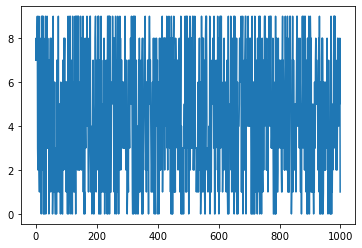

In [2]:
random.seed(11)
series = [random.randrange(10) for i in range(1000)]
series = pd.Series(series)
series.plot()
plt.show()

Random walk:

Steps to create random-walk:
- Start with a random either -1 or 1
- randomly select -1 or 1 and add it to the observation from the prev. time step
- repeat step2


`y(t) = B0 + B1*X(t-1) + e(t)`

- y(t) - next value in the series
- B0 - coefficient - if set value other than zero adds a drift to random walk
- B1 - coefficient - to weight the previuos time step - set to 1.0
- X(t-1) - previous time step's observation
- e(t) - white noise/ rabdom fluctuation at that time

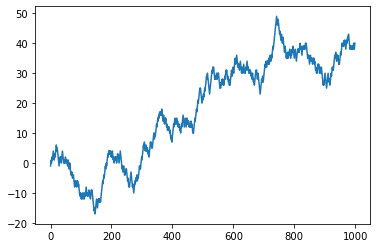

In [3]:
random.seed(11)
random_walk = list()
random_walk.append(-1 if random.random() < 0.5 else 1)
for i in range(1,1000):
    movement = -1 if random.random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

plt.plot(random_walk)
plt.show()

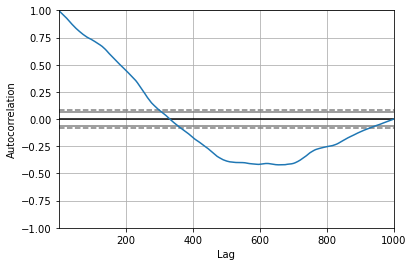

In [4]:
autocorrelation_plot(random_walk)
plt.show()

- all random-walk processes are non-stationary

In [5]:
# checking stationarity
random.seed(11)
random_walk = list()
random_walk.append(-1 if random.random() < 0.5 else 1)
for i in range(1,1000):
    movement = -1 if random.random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

result = adfuller(random_walk)
print(result)
print("ADF statistic: %f" %result[0])
print("p-value: %f" %result[1])
print("Critical values: ")
for key, value in result[4].items():
    print('\t%s: %.3f' %(key, value))

(-0.7959580540468102, 0.8203064762896477, 0, 999, {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}, 2774.9555814904966)
ADF statistic: -0.795958
p-value: 0.820306
Critical values: 
	1%: -3.437
	5%: -2.864
	10%: -2.568


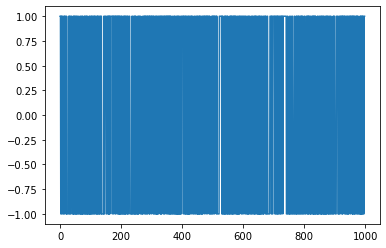

In [6]:
# making random-walk stationary
random.seed(11)
random_walk = list()
random_walk.append(-1 if random.random() < 0.5 else 1)
for i in range(1,1000):
    movement = -1 if random.random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)

diff = list()
for i in range(1, len(random_walk)):
    value = random_walk[i] - random_walk[i-1]
    diff.append(value)

plt.plot(diff)
plt.show()

- diff is just series of -1 and 1

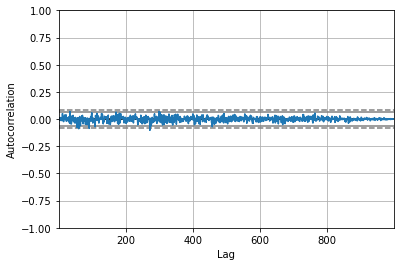

In [7]:
autocorrelation_plot(diff)
plt.show()

- no significant relationship between lagged observations

In [8]:
# predicting a random-walk
from sklearn .metrics import mean_squared_error
import math

random.seed(11)
random_walk = list()
random_walk.append(-1 if random.random() < 0.5 else 1)
for i in range(1,1000):
    movement = -1 if random.random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
    
train_size = int(len(random_walk)*0.66)
train, test = random_walk[0:train_size], random_walk[train_size:]

predictions = list()
history = train[-1]
for i in range(len(test)):
    yhat = history
    predictions.append(yhat)
    history = test[i]

rmse = math.sqrt(mean_squared_error(test, predictions))
print('RMSE :%.3f'%rmse)

RMSE :1.000


When time series is a random walk?
- it shows strong temporal dependence that decays linearly or in similar pattern
- it is non-stationary and making it stationary shows no obvious learnable structure in the data
- persistence model provides the best source of reliable predictions


- stock market prices are random walk and cannot be predicted --- THEORY
- A random walk is one in which future steps or directions cannot be predicted on the basis of past history. When the term is applied to the stock market, it means that short-run changes in stock prices are unpredictable